<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Pratique** | Árvore de Classificação  
## Caderno **Módulo 7 | Tarefa 2**<br>

Notebook [Diego Furukawa](#eu)

---

# **Introdução**

Neste módulo, vamos preparar a base de dados para que ela esteja adequada para análise e modelagem com a biblioteca scikit-learn, que será crucial para a nossa modelagem com árvores de classificação.

A biblioteca scikit-learn é amplamente utilizada para tarefas de aprendizado de máquina em Python e oferece uma vasta gama de algoritmos e ferramentas para modelagem. No nosso caso, utilizaremos uma árvore de classificação, que é uma técnica poderosa para prever a categoria a que um dado pertence com base em seus atributos. A árvore de decisão divide os dados em subsets, criando uma estrutura em forma de árvore onde cada nó representa uma decisão baseada em uma característica dos dados.

O objetivo é garantir que os dados estejam no formato adequado e explorar algumas características das variáveis. 

Vamos trabalhar com a base demo01.csv.

# 0. Índice dos Exercícios <a name="Contents"></a>
1. [Exercício 1: Carregue a base e garanta que a base está como deveria](#exerc_01)
2. [Exercício 2: Vamos para o Modelo](#exerc_02)
3. [Exercício 3: Vamos avaliar o modelo na base de testes](#exerc_03)

# 1. Exercício 1: Carregue a base e garanta que a base está como deveria <a name="exerc_01"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).


In [26]:
# Seu código aqui

# Importando Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Arvore
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# Acuracia
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Treino
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Carregando dataset do exercicio anterior
credit_card_approval_prediction = pd.read_csv('mod_07_exerc_01_export.csv')

#Retornar as primeiras 5 linhas
credit_card_approval_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    0 non-null      float64
 1   posse_de_veiculo                        16650 non-null  int64  
 2   posse_de_imovel                         16650 non-null  int64  
 3   qtd_filhos                              16650 non-null  int64  
 4   idade                                   16650 non-null  float64
 5   tempo_emprego                           16650 non-null  float64
 6   possui_celular                          16650 non-null  int64  
 7   possui_fone_comercial                   16650 non-null  int64  
 8   possui_fone                             16650 non-null  int64  
 9   possui_email                            16650 non-null  int64  
 10  qt_pessoas_residencia                   16650 non-null  fl

In [32]:
# Separe 70% da base para treinamento e 30% para validação
# Cada uma dessas partes terá dois objetos
# 1 - armazenando a variável resposta mau 
# 2 - outro armazenando as variáveis explicativas


# Dividindo a base em 70% treinamento e 30% validação
y = credit_card_approval_prediction.mau
X = credit_card_approval_prediction.drop('mau',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

clf_dt = DecisionTreeClassifier(random_state=100)
clf_dt = clf_dt.fit(X,y)


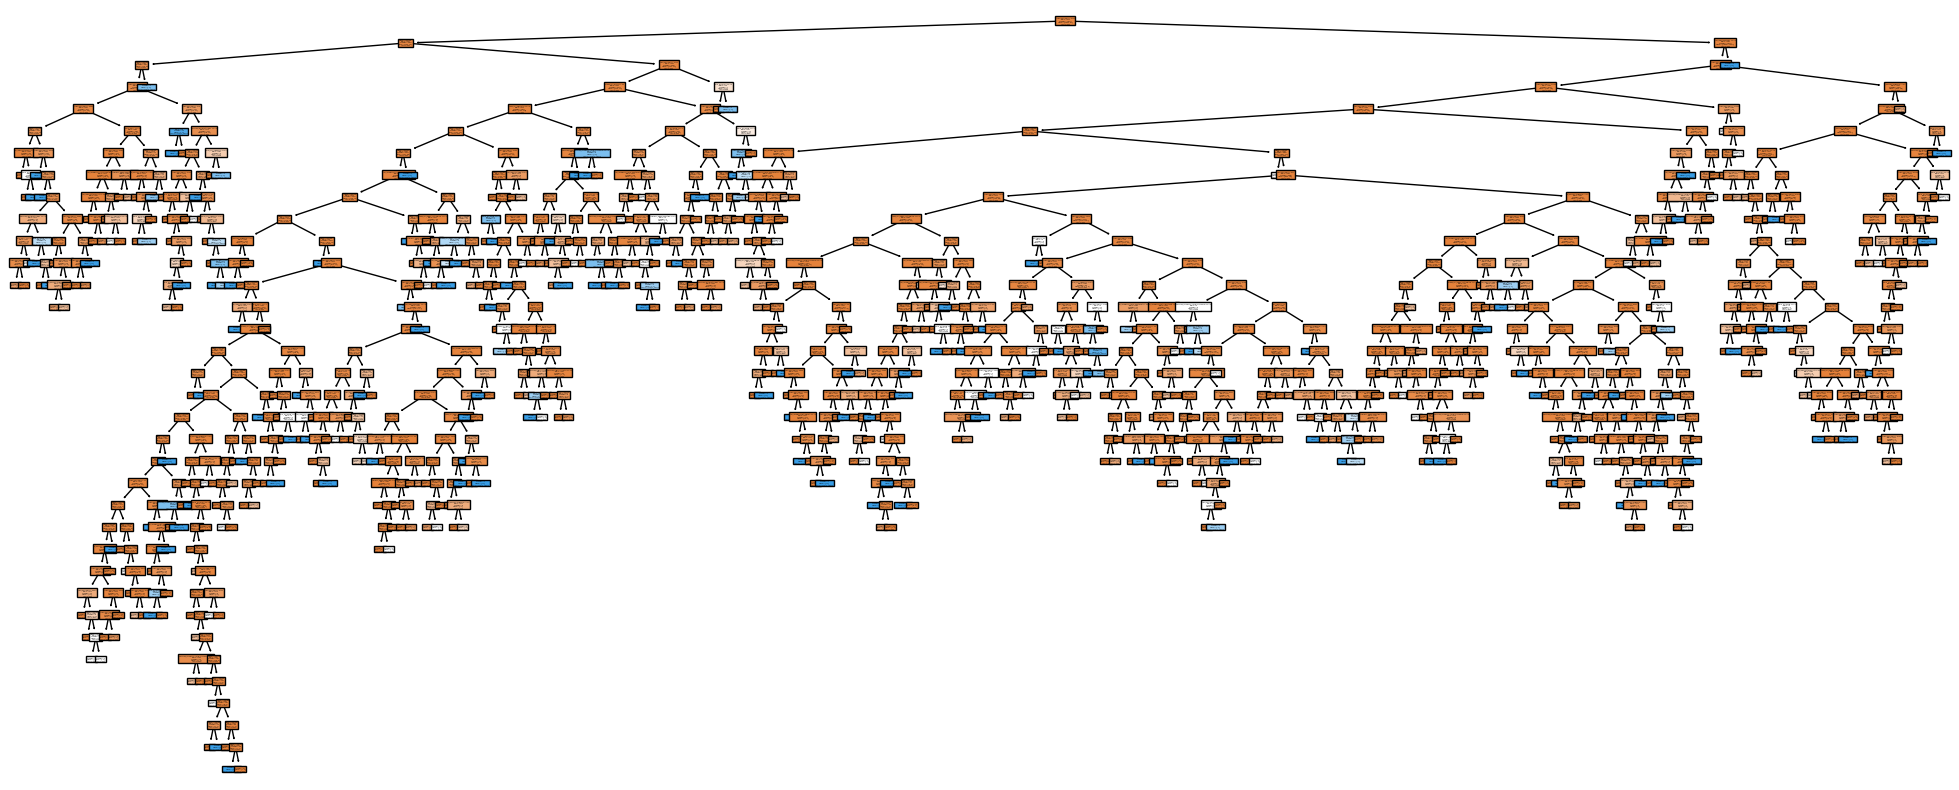

In [29]:
plt.figure(figsize=(25, 10))
plot_tree(clf_dt,
          filled=True,
          class_names=['mau', 'posse_de_imovel'],
          feature_names=list(X.columns));

# 2. Exercício 2: Vamos para o Modelo <a name="exerc_02"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

# 3. Exercício 3: Vamos avaliar o modelo na base de testes <a name="exerc_03"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?